# Primera parte de la tarea II Física Computacional
## Cuadratura gaussiana para la función sen(x^2)

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def gaussxw(N):
    """
    Calcula los nodos y pesos para la cuadratura de Gauss-Legendre.

    Args:
        N (int): Número de nodos.

    Returns:
        tuple: Nodos (x) y pesos (w) en el intervalo [-1, 1].
    """
    x, w = np.polynomial.legendre.leggauss(N)
    return x, w

Comenzamos definiendo una funcion que nos calcula los nodos y los pesos que la cuadratura gaussiana requiere para operar, donde N es el número de nodos de entrada. Lo que devuelve es una tupla [x,w] que son los respectivamente los nodos y los pesos calculados.

In [4]:
def gaussxwab(a, b, x, w):
    """
    Escala nodos y pesos del intervalo [-1, 1] al intervalo [a, b].

    Args:
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        x (ndarray): Nodos en [-1, 1].
        w (ndarray): Pesos en [-1, 1].

    Returns:
        tuple: Nodos y pesos escalados al intervalo [a, b].
    """
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w
    return xp, wp

Con la segunda función, tomamos como argumentos los nodos y los pesos previamente calculados así como los limites inferior y superordel intervalo sobre el que se trabja, con estos calculamos los nodos escalados al intervalo de integración. La funcion retorna una tupla [nodo,peso] escalada.

In [5]:
def integrando(x):
    """
    Función a integrar: sin(x^2).

    Args:
        x (float or ndarray): Punto(s) donde se evalúa.

    Returns:
        float or ndarray: Valor(es) de sin(x^2).
    """
    return np.sin(x**2)

Pasamos a definir una función que se encarga de tomar una variable x y retornar la funcion senosoidal de $x^2$.

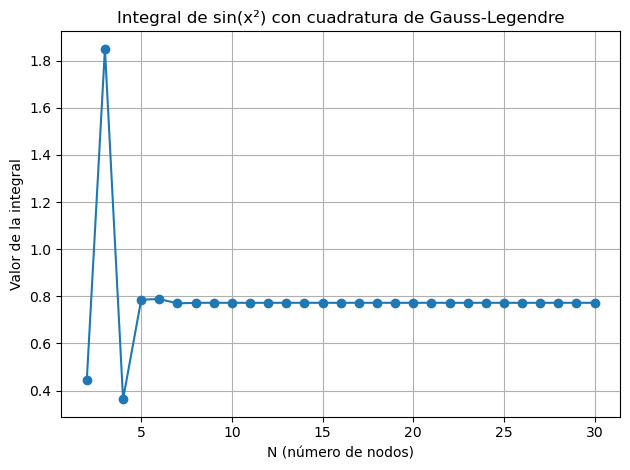

In [7]:
def main():
    """
    Ejecuta la integración para varios valores de N y genera un gráfico
    del valor de la integral en función de N.
    """
    a, b = 0, np.pi
    N_vals = range(2, 31)
    integrales = []

    for N in N_vals:
        x, w = gaussxw(N)
        xp, wp = gaussxwab(a, b, x, w)
        integral = np.sum(wp * integrando(xp))
        integrales.append(integral)

#Se plotea la grafica de la integral contra N.
    plt.figure(dpi=100)
    plt.plot(N_vals, integrales, marker='o')
    plt.xlabel("N (número de nodos)")
    plt.ylabel("Valor de la integral")
    plt.title("Integral de sin(x²) con cuadratura de Gauss-Legendre")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

main()

Finalmente se construye una función main en el que se definen los parámetros especificos al problema, como los son los límites de integración así como la cantidad de nodos para los que se utilizaran. Se definen los nodos N_vals como un rango para poder observar como cambia la presición del calculo integral con el aumento de nodos. Continuamos definiendo las integrales como una lista vacía, pues esta es dependiente de N, por lo que Haciendo uso de un for loop definimos el valor que tiene "integrales" recorriendo N de 2 a 30 y añadiendolos a la lista con el .append. Finalmente se plotea una gráfica de el valor de la integral contra el número de nodos para poder visualizar el cambio en precisión que tiene el valor calculado con respecto a N. 